In [4]:
completeP = 'energydata_complete.csv'
testP = 'testing.csv'
trainingP = 'training.csv'

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pylab as plt
from scipy import stats
import matplotlib.dates as mdates
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn import preprocessing 
%matplotlib inline 

In [6]:
# Load the data and show the info and contents:
df = pd.read_csv(completeP) 
#df.set_index('date', inplace=True)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Variable Description
====================

- date time year-month-day hour:minute:second 
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chièvres weather station), in Celsius
- Pressure (from Chièvres weather station), in mm Hg
- RH_out, Humidity outside (from Chièvres weather station), in %
- Windspeed (from Chièvres weather station), in m/s
- Visibility (from Chièvres weather station), in km
- Tdewpoint (from Chièvres weather station), °C
- rv1, Random variable 1, nondimensional
- rv2, Rnadom variable 2, nondimensional

Text(0, 0.5, 'Count')

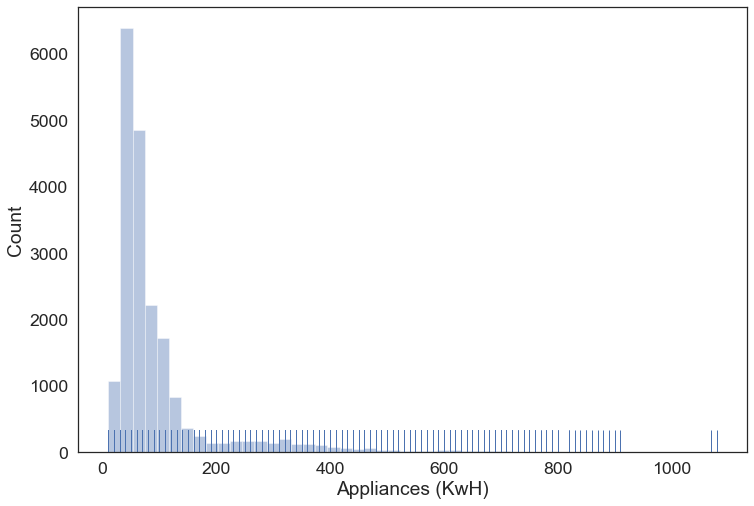

In [7]:
sns.set(rc={'figure.figsize':(12,8.2)},style='white', font_scale=1.6)
sns.distplot(df['Appliances'],kde=False,rug=True)
plt.xlabel('Appliances (KwH)')
plt.ylabel('Count')

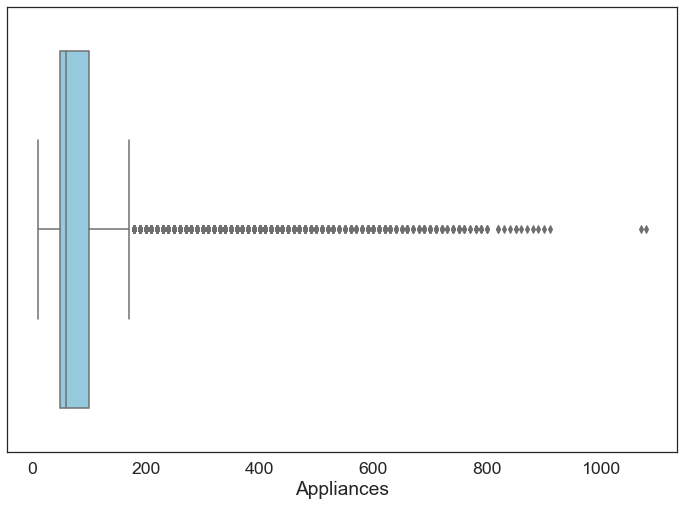

In [8]:
box = sns.boxplot(x=df['Appliances'], color='skyblue')
box

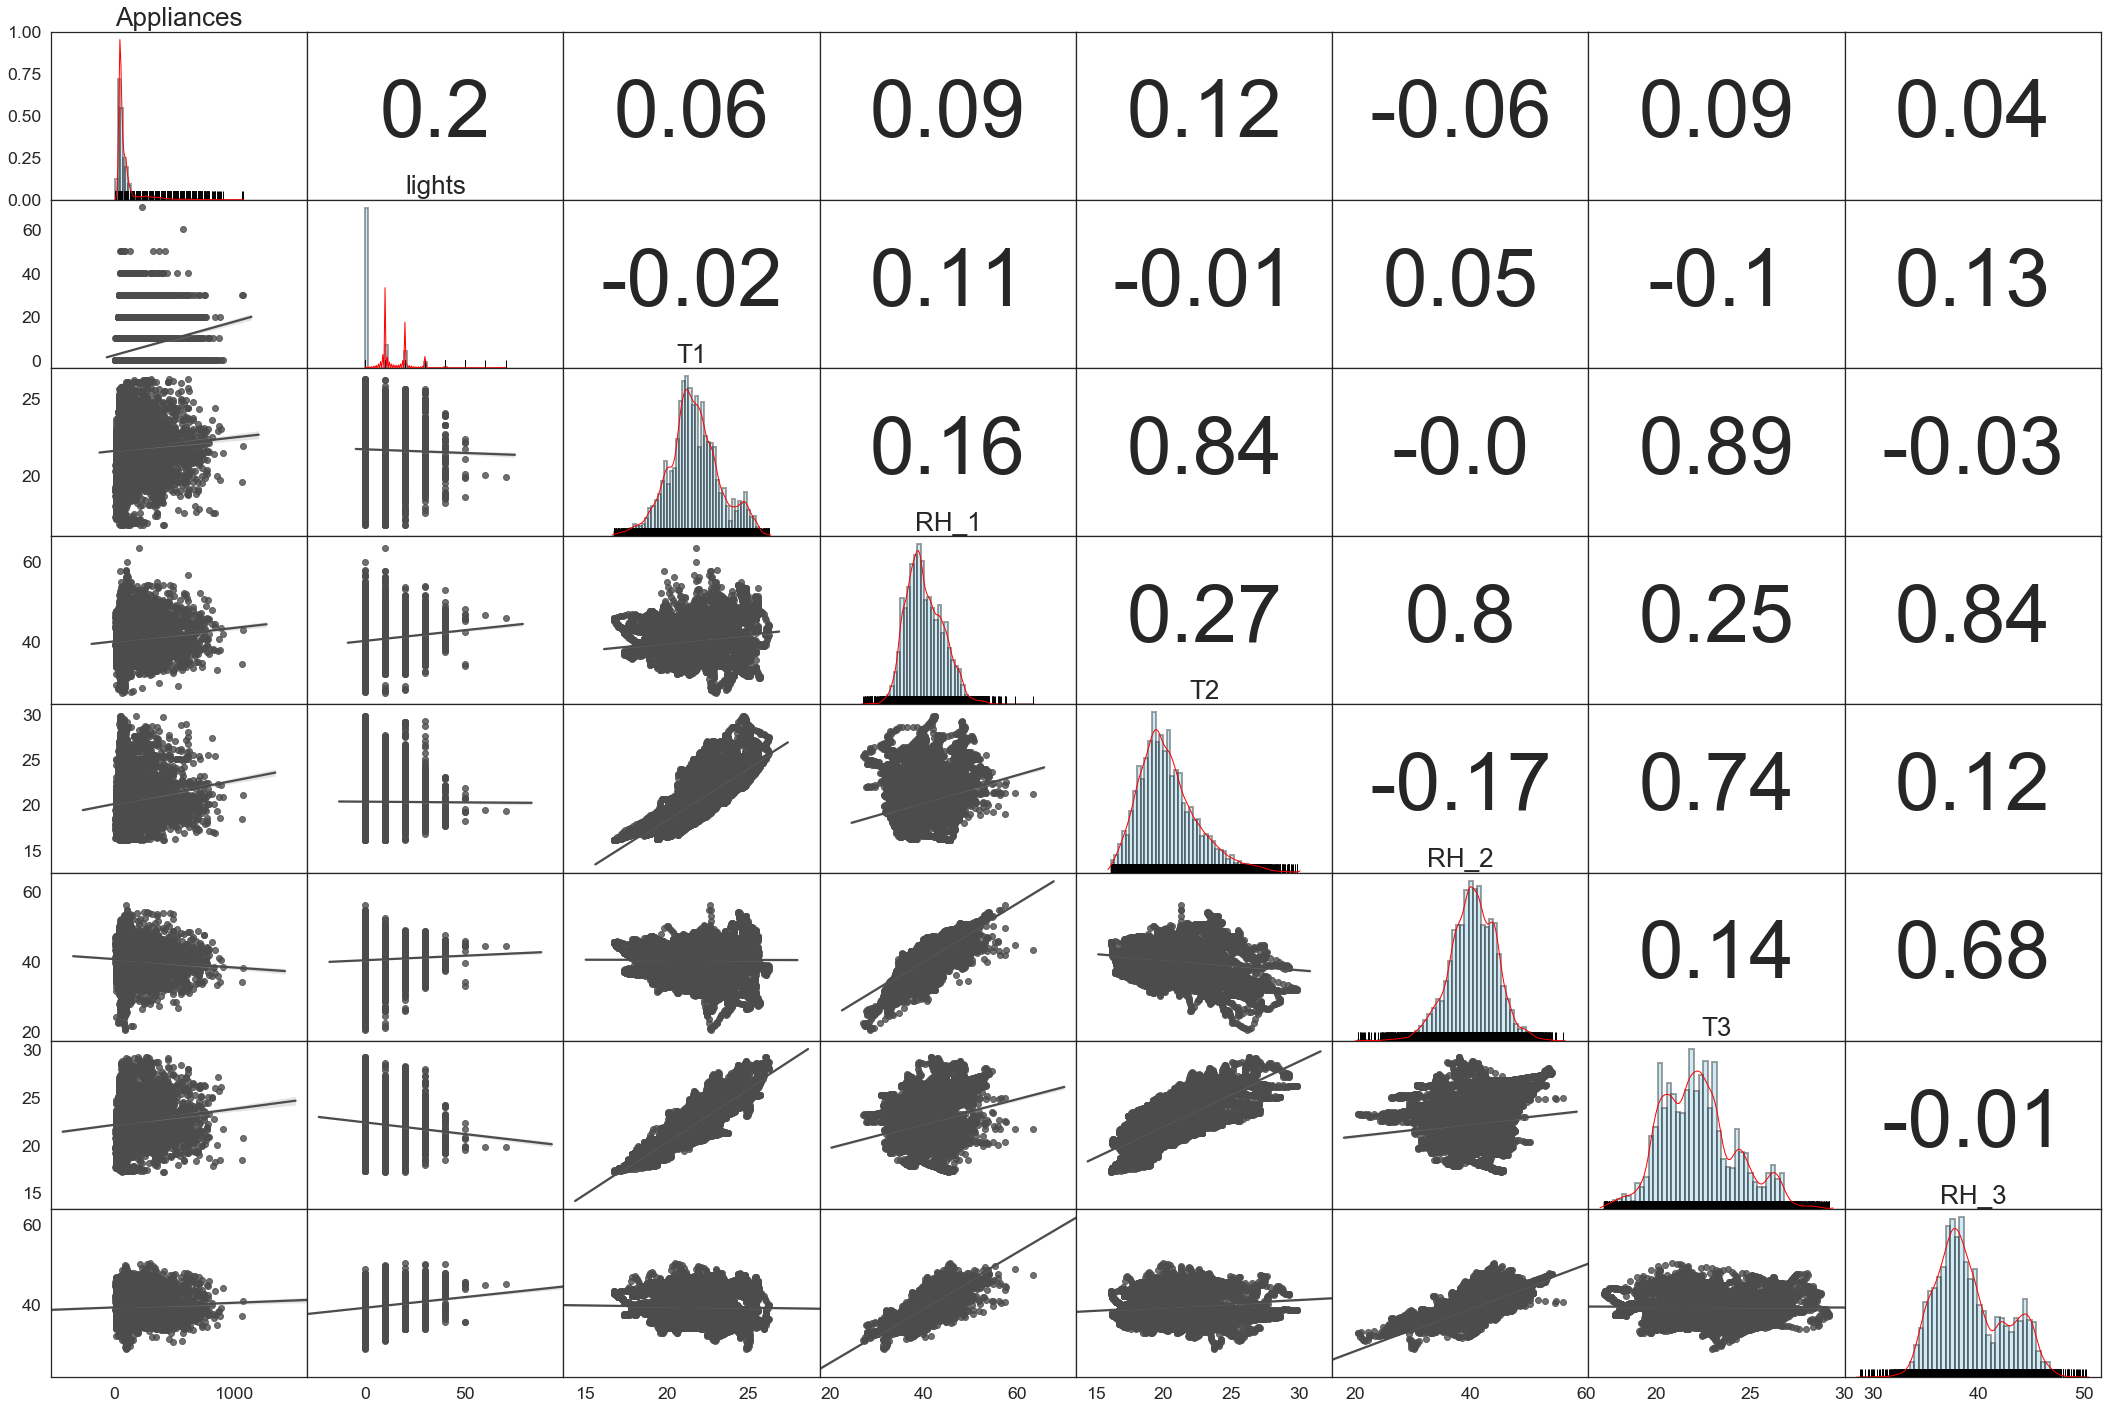

In [9]:
var = df[['Appliances', 'lights','T1','RH_1','T2','RH_2','T3','RH_3']]
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=80)
    

g = sns.PairGrid(var, aspect=1.5, diag_sharey=False, despine=False)
g.map_diag(sns.distplot, color='skyblue',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'skyblue'})
g.map_diag(sns.rugplot, color='black')
g.map_lower(sns.regplot, color='.3')
g.map_upper(corrdot)
#g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)
#Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), var.columns):
    ax.set_title(col, y=0.82, fontsize=26)
#remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')


In [10]:
var 

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000
5,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333
6,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000
7,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000
8,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000
9,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333


In [ ]:
feature_cols = df.drop('Appliances')._get_numeric_data()
feature_cols

In [ ]:
estimator = LinearRegression()
#feature_cols = np.array(['lights', 'T1', 'RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7', 
                        # 'RH_7','T8','RH_8','T9', 'RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint', 
                         #'rv1','rv2'])
X = df[feature_cols]
y = df.Appliances
selector = RFE(estimator)
select = selector.fit(X,y)
supp = selector.get_support()
print('Selected features:', feature_cols[supp])
print('Coeffs:', selector.estimator_.coef_)

In [ ]:
train = pd.read_csv('testing.csv')
reg = linear_model.LinearRegression()
X = train[feature_cols[supp]]
y = train.Appliances
reg.fit(X,y)
print("y = x *", reg.coef_, "+", reg.intercept_)


In [ ]:
corr = train[feature_cols[supp]].corr()
corr

In [ ]:
for i, item in enumerate(reg.predict(X[:20])):
    print('Actual usage is:', y.iloc[i], 'predicted usage is:', item)

In [ ]:
predicted = reg.predict(X)
r2 = r2_score(y,predicted)
MSE = metrics.mean_squared_error(y, predicted)
print('MSE:', MSE)
print('R Squared:',r2)

In [ ]:
n_var = preprocessing.normalize(var,norm='l1')
n_var
var
n_var = pd.DataFrame(n_var, columns=['Appliances', 'lights','T1','RH_1','T2','RH_2','T3','RH_3'])
n_corr = n_var.corr()
sns.heatmap(n_corr[['Appliances']])